In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
dataset_path = r"C:\Users\PC\Desktop\black-friday-dataset"
df_train = pd.read_csv(dataset_path + r"\train.csv")
df_test = pd.read_csv(dataset_path + r"\test.csv")

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


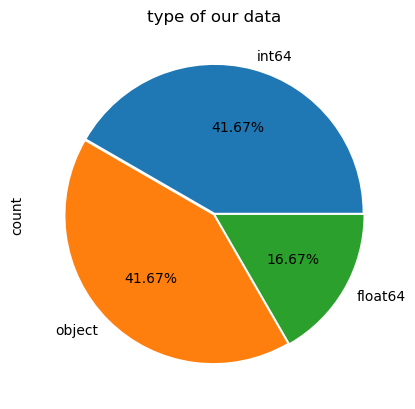

In [6]:
df_train.dtypes.value_counts().plot.pie(autopct="%1.2f%%" , explode=[0.01,0.01,0.01])
plt.title('type of our data');
plt.show()

### Categorical Features

In [8]:
categorical_cols = [ column for column in df_train.columns if df_train[column].dtype == "object" ]
categorical_cols

['Product_ID', 'Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']

### Numeric Features

In [10]:
numeric_cols = [ column for column in df_train.columns if df_train[column].dtype != "object" ]
numeric_cols

['User_ID',
 'Occupation',
 'Marital_Status',
 'Product_Category_1',
 'Product_Category_2',
 'Product_Category_3',
 'Purchase']

In [11]:
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [12]:
df_train.describe(include='all')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068,550068,550068,550068.000000,550068,550068,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
unique,NaN,3631,2,7,NaN,3,5,NaN,NaN,NaN,NaN,NaN
top,NaN,P00265242,M,26-35,NaN,B,1,NaN,NaN,NaN,NaN,NaN
freq,NaN,1880,414259,219587,NaN,231173,193821,NaN,NaN,NaN,NaN,NaN
mean,1.003029e+06,NaN,NaN,NaN,8.076707,NaN,NaN,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,NaN,NaN,NaN,6.522660,NaN,NaN,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,NaN,NaN,NaN,2.000000,NaN,NaN,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,NaN,NaN,NaN,7.000000,NaN,NaN,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,NaN,NaN,NaN,14.000000,NaN,NaN,1.000000,8.000000,15.000000,16.000000,12054.000000


### Basic Observations:
1. Most transactions were made by men
2. City B is the most popular
3. Most transcations by people who are relatively new to the city (1 year)
4. People aged 26-35 made the most purchases

In [14]:
missing_values = df_train.isnull().sum()
missing_values_pct = df_train.isnull().sum() / df_train.shape[0] * 100

missing_df = pd.DataFrame( { 'missing values' : missing_values , 'missing values percentage' : missing_values_pct } )
missing_df

,missing values,missing values percentage
User_ID,0,0.000000
Product_ID,0,0.000000
Gender,0,0.000000
Age,0,0.000000
Occupation,0,0.000000
City_Category,0,0.000000
Stay_In_Current_City_Years,0,0.000000
Marital_Status,0,0.000000
Product_Category_1,0,0.000000
Product_Category_2,173638,31.566643


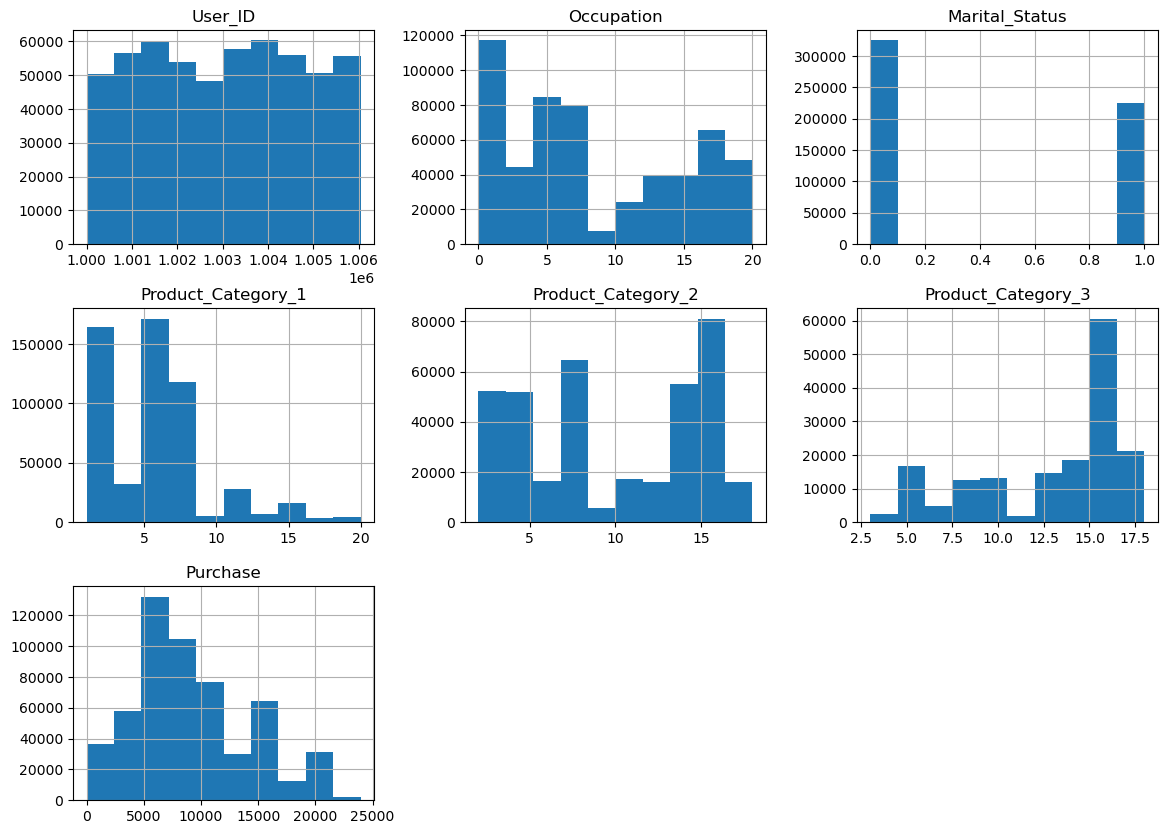

In [15]:
df_train.loc[ : , numeric_cols].hist(figsize=(14,10))
plt.show()

In [16]:
#df = pd.concat([ df_train , df_test ] , ignore_index=True)
df = df_train.copy()
df = df.iloc[ : , 2: ]
df.shape

(550068, 10)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      550068 non-null  object 
 1   Age                         550068 non-null  object 
 2   Occupation                  550068 non-null  int64  
 3   City_Category               550068 non-null  object 
 4   Stay_In_Current_City_Years  550068 non-null  object 
 5   Marital_Status              550068 non-null  int64  
 6   Product_Category_1          550068 non-null  int64  
 7   Product_Category_2          376430 non-null  float64
 8   Product_Category_3          166821 non-null  float64
 9   Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 42.0+ MB


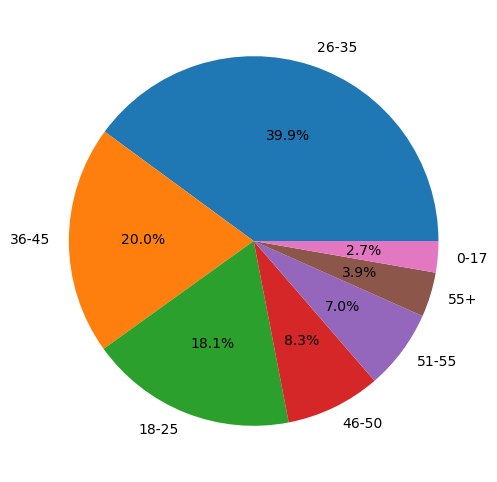

In [18]:
age_df = df.Age.value_counts().reset_index()
age_groups = age_df['Age']
age_values =  age_df['count']

plt.figure( figsize=(10,6) )
plt.pie( age_values , labels=age_groups , autopct="%1.1f%%" )
plt.show()

In [19]:
df['Gender'].value_counts()

Gender
M    414259
F    135809
Name: count, dtype: int64

In [20]:
df['Gender'] = df['Gender'].replace({ 'F' : 0 , 'M' : 1 })

C:\Users\PC\AppData\Local\Temp\ipykernel_5272\586565581.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender'] = df['Gender'].replace({ 'F' : 0 , 'M' : 1 })


In [21]:
df['Age'] = df['Age'].replace({
    '0-17' : 0,
    '18-25' : 1,
    '26-35' : 2,
    '36-45' : 3,
    '46-50' : 4,
    '51-55' : 5,
    '55+' : 6
})

C:\Users\PC\AppData\Local\Temp\ipykernel_5272\635631703.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Age'] = df['Age'].replace({


In [22]:
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].str.replace('+' , '')
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype(int)

In [23]:
df.columns

Index(['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      550068 non-null  int64  
 1   Age                         550068 non-null  int64  
 2   Occupation                  550068 non-null  int64  
 3   City_Category               550068 non-null  object 
 4   Stay_In_Current_City_Years  550068 non-null  int32  
 5   Marital_Status              550068 non-null  int64  
 6   Product_Category_1          550068 non-null  int64  
 7   Product_Category_2          376430 non-null  float64
 8   Product_Category_3          166821 non-null  float64
 9   Purchase                    550068 non-null  int64  
dtypes: float64(2), int32(1), int64(6), object(1)
memory usage: 39.9+ MB


In [25]:
df

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,0,10,A,2,0,3,NaN,NaN,8370
1,0,0,10,A,2,0,1,6.0,14.0,15200
2,0,0,10,A,2,0,12,NaN,NaN,1422
3,0,0,10,A,2,0,12,14.0,NaN,1057
4,1,6,16,C,4,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1,5,13,B,1,1,20,NaN,NaN,368
550064,0,2,1,C,3,0,20,NaN,NaN,371
550065,0,2,15,B,4,1,20,NaN,NaN,137
550066,0,6,1,C,2,0,20,NaN,NaN,365


In [26]:
df_preprocessed = pd.concat( [pd.get_dummies(df['City_Category'] , drop_first=True ) , df ]  , axis=1 )
df_preprocessed.drop("City_Category" , axis=1 , inplace=True)

In [27]:
df_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   B                           550068 non-null  bool   
 1   C                           550068 non-null  bool   
 2   Gender                      550068 non-null  int64  
 3   Age                         550068 non-null  int64  
 4   Occupation                  550068 non-null  int64  
 5   Stay_In_Current_City_Years  550068 non-null  int32  
 6   Marital_Status              550068 non-null  int64  
 7   Product_Category_1          550068 non-null  int64  
 8   Product_Category_2          376430 non-null  float64
 9   Product_Category_3          166821 non-null  float64
 10  Purchase                    550068 non-null  int64  
dtypes: bool(2), float64(2), int32(1), int64(6)
memory usage: 36.7 MB


In [28]:
# just trying this out , change it later
df_preprocessed.fillna(0 , inplace=True)
df_preprocessed

,B,C,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,False,False,0,0,10,2,0,3,0.0,0.0,8370
1,False,False,0,0,10,2,0,1,6.0,14.0,15200
2,False,False,0,0,10,2,0,12,0.0,0.0,1422
3,False,False,0,0,10,2,0,12,14.0,0.0,1057
4,False,True,1,6,16,4,0,8,0.0,0.0,7969
...,...,...,...,...,...,...,...,...,...,...,...
550063,True,False,1,5,13,1,1,20,0.0,0.0,368
550064,False,True,0,2,1,3,0,20,0.0,0.0,371
550065,True,False,0,2,15,4,1,20,0.0,0.0,137
550066,False,True,0,6,1,2,0,20,0.0,0.0,365


In [29]:
df_preprocessed.isnull().sum()

B                             0
C                             0
Gender                        0
Age                           0
Occupation                    0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [30]:
X_train= df_preprocessed.iloc[ : , :-1]
y_train = df_preprocessed.iloc[ : , -1]

In [31]:
print(X_train.shape)
print(y_train.shape)

(550068, 10)
(550068,)


In [32]:
from sklearn.metrics import root_mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

column_transformer = ColumnTransformer(
    [
        ('scaler' , StandardScaler() , ["Occupation" ,  "Product_Category_1" , "Product_Category_2" , "Product_Category_3" ] ),
        #('poly', PolynomialFeatures(degree=3), ["Gender", "Age", "Occupation", "Marital_Status"])
    ],
    remainder='passthrough'
)

pipeline = Pipeline([
    ('scaler' , column_transformer),
    #('polynomial_features' ,PolynomialFeatures(degree=3))
])


X_train = column_transformer.fit_transform(X_train)

In [33]:
X_train.shape

(550068, 10)

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from joblib import parallel_backend

models = {
    'Linear Regression' : LinearRegression(),
    'K Nearest Neighbors' : KNeighborsRegressor(n_neighbors = 7),
    'Gradient Boosted Regressor' : GradientBoostingRegressor()
}

for name , model in models.items():
    with parallel_backend(backend="loky" , n_jobs=-1):
        print(name , " : " , model)
        scores = cross_val_score( model , X_train , y_train , cv=5 , scoring="neg_mean_squared_error" , n_jobs=-1)
        rmse_scores = np.sqrt(-scores)
        print("Mean score for " , name , " : " , rmse_scores.mean() )
        print("\n")
    

Linear Regression  :  LinearRegression()
Mean score for  Linear Regression  :  4627.679349386244



K Nearest Neighbors  :  KNeighborsRegressor(n_neighbors=7)
Mean score for  K Nearest Neighbors  :  3618.345346235024



Gradient Boosted Regressor  :  GradientBoostingRegressor()
Mean score for  Gradient Boosted Regressor  :  2993.4202562349083





In [59]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators' : [100 , 150],
    'learning_rate' : [0.1 , 0.05],
    'max_depth' : [3 , 5]
}

with parallel_backend(backend="loky"):
    model = GridSearchCV(estimator=GradientBoostingRegressor() , param_grid=param_grid , cv=5 , scoring="neg_mean_squared_error" , n_jobs=-1)
    model.fit(X_train , y_train)


In [69]:
model.best_params_

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 150}

In [63]:
pd.DataFrame(model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,85.528083,1.832274,0.326773,0.027856,0.10,3,100,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",-8.955480e+06,-8.917729e+06,-8.939950e+06,-8.961181e+06,-9.028675e+06,-8.960603e+06,37215.907398,6
1,114.566965,5.246745,0.402322,0.027314,0.10,3,150,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",-8.846952e+06,-8.819674e+06,-8.835029e+06,-8.858978e+06,-8.928289e+06,-8.857785e+06,37576.387793,5
2,123.568688,1.389359,0.347372,0.041935,0.10,5,100,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",-8.614568e+06,-8.580243e+06,-8.597234e+06,-8.604938e+06,-8.682643e+06,-8.615925e+06,35203.364311,2
3,178.441099,2.660906,0.471762,0.012055,0.10,5,150,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",-8.538389e+06,-8.501596e+06,-8.511767e+06,-8.528012e+06,-8.606379e+06,-8.537229e+06,36840.145243,1
4,74.071407,0.869103,0.284778,0.002788,0.05,3,100,"{'learning_rate': 0.05, 'max_depth': 3, 'n_est...",-9.294037e+06,-9.245156e+06,-9.267592e+06,-9.274755e+06,-9.450262e+06,-9.306360e+06,73630.524532,8
5,111.059913,1.297927,0.389166,0.022831,0.05,3,150,"{'learning_rate': 0.05, 'max_depth': 3, 'n_est...",-9.052722e+06,-9.022338e+06,-9.041983e+06,-9.043011e+06,-9.193584e+06,-9.070728e+06,62215.643161,7
6,119.318227,0.954720,0.355968,0.007451,0.05,5,100,"{'learning_rate': 0.05, 'max_depth': 5, 'n_est...",-8.781227e+06,-8.747514e+06,-8.786927e+06,-8.807993e+06,-8.880828e+06,-8.800898e+06,44432.133919,4
7,151.484629,16.524483,0.369972,0.037806,0.05,5,150,"{'learning_rate': 0.05, 'max_depth': 5, 'n_est...",-8.683723e+06,-8.638770e+06,-8.680965e+06,-8.687918e+06,-8.759306e+06,-8.690136e+06,38866.736858,3


In [67]:
results = pd.DataFrame(model.cv_results_)
results.iloc[ : , [8,9,10,11,12,13] ].apply( lambda x : np.sqrt(-x) )


,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score
0,2992.570871,2986.256767,2989.974942,2993.523252,3004.775448,2993.426699
1,2974.382709,2969.793627,2972.377610,2976.403525,2988.024334,2976.203041
2,2935.058495,2929.205155,2932.104067,2933.417407,2946.632448,2935.289626
3,2922.052258,2915.749721,2917.493220,2920.276069,2933.663014,2921.853642
4,3048.612250,3040.584867,3044.272066,3045.448282,3074.127813,3050.632801
5,3008.774191,3003.720711,3006.988981,3007.159957,3032.092360,3011.764867
6,2963.313452,2957.619684,2964.275039,2967.826360,2980.071736,2966.630687
7,2946.815734,2939.178469,2946.347746,2947.527465,2959.612495,2947.903742


In [71]:
final_model = GradientBoostingRegressor( n_estimators=200 , learning_rate=0.1 , max_depth=6 )
final_model.fit(X_train , y_train)

GradientBoostingRegressor(max_depth=6, n_estimators=200)

In [77]:
from sklearn.metrics import root_mean_squared_error

y_hat_test = final_model.predict(X_train)
y_test = y_train

rmse = root_mean_squared_error(y_test , y_hat_test)
print("RMSE : " , rmse)

RMSE :  2867.4016325172292
